<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg">
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 2 - Greedy </h2>
</center>
</p>
</div>

<div style="width:90%; margin:0 auto;">
  <h2><p>Minimum Spanning Tree</p></h2>
  <p>
Dado un grafo conexo y no dirigido, un spanning tree de ese grafo es un subgrafo que tiene que ser un árbol (sin ciclos) y contener todos los vértices del grafo inicial. Cada arista tiene asignado un peso, que es un número representativo de algún objeto, distancia, etc. y se usa para asignar un peso total al MST computando la suma de todos los pesos de las aristas del árbol en cuestión. Un MST o minimum spanning tree es un árbol recubridor que pesa menos o igual que caulquier otro árbol recubridor de ese grafo. Todo grafo tiene un bosque recubridor mínimo.
  </p>
<img width="300px" src="img/mst.png">
  </div>



<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1- Kruskal Algorithm</p></h2>
  El algoritmo de Kruskal es un algoritmo voraz que calcula el MST de un grafo dado. Se basa en ir añadiendo a cada paso la arista más pequeña del grafo que conecte dos subárboles que no estaban previamente conectados.
    
   <center><img width="250px" src="./img/KruskalDemo.gif"></center>

<p>
En este apartado tendréis que implementar el algoritmo de Kruskal para obtener el Minimum Spanning Tree de cualquier grafo no dirigido. 
  </p>


In [4]:
# Imports
import networkx as nx

In [5]:
def kruskal(G):
    """ Implementación del algoritmo de Kruskal para obtener el MST de un grafo cualquiera.
    Args:
        G (nx.Graph): El grafo de tipo nx.Graph sobre el que queremos obtener el MST. 
                      Las aristas tienen el atributo 'weight' que indica su peso.
    Returns:
        tree (nx.Graph): El grafo de tipo nx.Graph que contiene el arbol de expansión mínima.
        weight (float/int): El peso total del grafo tree.
    """
    tree = nx.Graph()
    total_weight = 0  
    # Implement Kruskal algorithm here
    
    #primero ordenamos las aristas de menor a mayor
    lista_arestas = sorted(list(G.edges.data()), key = lambda x: x[2]['weight'])
    #creamos un arbol o componente conexo para cada nodo
    componentes = []
    for node in G.nodes():
        componentes.append({node})
    
    index1 = 0 #variables que nos indicaran los componentes en los que se encuentran los nodos
    index2 = 0
    
    #recorremos cada aresta del grafo por orden de menor a mayor
    for edge in lista_arestas:
        #para cada "componente conexo" creado
        for componente in componentes:
            #miramos si los nodos de la arista actual se encuentran en el componente que miramos
            if (edge[0] in componente):
                index1 = componentes.index(componente)
            if (edge[1] in componente):
                index2 = componentes.index(componente)
                
        #si los indices son diferentes, podremos añadir la aresta al grafo (no se crea ciclo)
        if (index1 != index2):
            tree.add_edge(edge[0],edge[1]) #añadimos la aresta al arbol
            componentes[index1] = componentes[index1] | componentes[index2] #unimos el segundo componente al primero
            total_weight += edge[2]['weight'] #sumamos el weight de la aresta
            componentes.pop(index2) #eliminamos el segundo componente
        
        if (len(componentes) == 1): #si solo nos queda un componente, break (ya hemos acabado el arbol)
            break
    
    return tree, total_weight

In [6]:
kruskal(G)

(<networkx.classes.graph.Graph at 0x23d83a80748>, 20)


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>2- Prim Algorithm</p></h2>
  Igual que Kruskal, el algoritmo de Prim es un algoritmo voraz que calcula el MST de un grafo dado. La diferencia fundamental es en el orden en que se añaden aristas. Prim empieza en un nodo concreto y se basa en ir añadiendo a cada paso la arista más pequeña de entre las que conectan los nodos ya pertenecientes al árbol con sus vecinos.
    
   <center><img width="250px" src="./img/PrimDemo.gif"></center>

<p>
En este apartado tendréis que implementar el algoritmo de Prim para obtener el Minimum Spanning Tree de cualquier grafo no dirigido y conexo. 
  </p>


In [28]:
import heapq
import random
def prim(G,origen=None,infinity=float('inf')):
    """ Implementación del algoritmo de Kruskal para obtener el MST de un grafo cualquiera.
    Args:
        G (nx.Graph): El grafo sobre el que queremos obtener el MST. 
                      Las aristas tienen el atributo 'weight' que indica su peso.
        origin (node_id): Opcional, nodo por el cual comenzar la búsqueda.
        infinity (float): Opcional, valor para inicializar las distancias.
    Returns:
        tree (nx.Graph): El grafo que contiene el arbol de expansión mínima.
        weight (float/int): El peso total del grafo tree.
    """
    tree = nx.Graph()
    total_weight = 0
    # Implement Prim algorithm here
    if (origen == None):
        origen = random.choice(list(G.nodes())) #asignamos un nodo random como origen
    S = set() #set donde iremos guardando los nodos del arbol
    S.add(origen) 
    
    while (len(S) != len(G.nodes())) : #mientras no hayamos cogido todos los nodos
        lista_arestas = [] 
        for node in S: #para cada nodo del conjunto mirarremos sus vecinos
            for neigh in G.neighbors(node):
                if (neigh not in S): #si el vecino no se encuentra en S, añadiremos la arista en lista_arestas
                    heapq.heappush( lista_arestas, (G[node][neigh]['weight'],node, neigh) )
        
        min_edge = heapq.heappop(lista_arestas) #cogemos la aresta minima
        
        S.add(min_edge[2]) #añadimos el nodo vecino a S
        tree.add_edge(min_edge[1],min_edge[2]) #añadimos la aresta al arbol
        total_weight += min_edge[0] #sumamos el peso de la arista
        
    '''
    actual_node = origen
    while (len(list(G.nodes())) != len(list(tree.nodes()))):
        
        for neigh in G.neighbors(actual_node):
    '''       
    
    return tree, total_weight

In [29]:
prim(G)

(<networkx.classes.graph.Graph at 0x23d86dafeb8>, 18)

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Tests </h3></p> </center>
<p>
Realiza los tests pertinentes en las celdas dispuestas a continuación.
</p>
</div>


TOTAL MST WEIGHT
NX MST  18
Kruskal 18
Prim    18


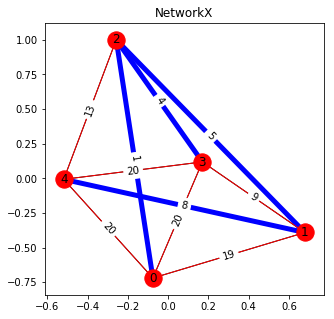

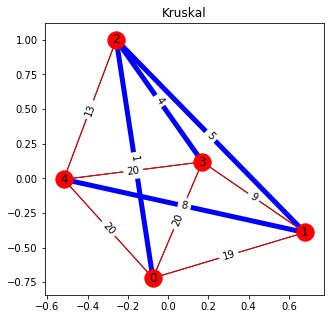

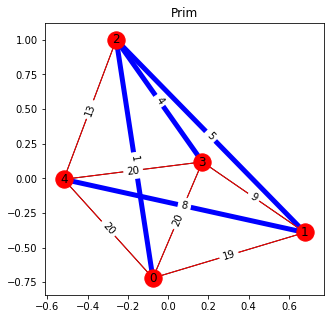

In [25]:
%matplotlib inline
from utils import *

# Create random Graph
num_v = 5 # Num nodes
num_e = 15 # Num edges
G = generate_random_graph(num_v,num_e)

# Run test
test_algs(G,kruskal,prim,0) # 0 for both, 1 for kruskal only, 2 for prim only

<div class="alert alert-warning">
<h1>Pregunta 1</h1>
<p><strong>
Explica las diferencias entre los algoritmos de Kruskal y Prim. ¿Para qué casos (características concretas de un grafo) es uno más eficiente que el otro?
</strong></p>
</div>

El algoritmo de Kruskal trabaja sobre las arestas del grafo y el de Prim sobre los nodos. Será más eficiente usar kruskal para un grafo con menos aristas y más nodos, y usar Prim para un grafo con menos nodos y más aristas.

<div class="alert alert-warning">
<h1>Pregunta 2</h1>
<p><strong>
Explica tu implementación y analiza la complejidad de ambos algoritmos.
</strong></p>
</div>

Para implementar Kruskal primero tenemos que ordenar las aristas de menor a mayor peso. Para ello he utilizado la funcion sorted, ordenándolas a partir del 'weight'. He usado sets para definir cada componente conexo del grafo, que al principio hay uno para cada nodo. Con un for recorreremos por orden todas las aristas del grafo. Los index nos mostraran en que componente del grafo se encuentra cada nodo de la arista que miramos. Si estos indices coinciden, ignoraremos la arista, ya que se crearía un ciclo. Si no coinciden, procederemos a añadir la arista en el árbol, sumando su peso y actualizando los componentes (añadir el set del index2 al index1, y borrar el index2).
La complejidad del algoritmo kruskal es de O(E · log E), siendo E el número de aristas del grafo.

Para Prim también he usado un set para el conjunto S, que serán todos los nodos que vaya añadiendo al árbol. Se añade el origen al principio, y entramos en un while hasta que el numero de nodos en S sea igual al del grafo, es decir, cuando hayamos añadido todos los nodos al árbol. Para cada iteración deberemos actualizar la lista de aristas, recorriendo todos los vecinos de todos los nodos de S y comprobando que dichos vecinos no pertenecen a S (en ese caso se añade la aresta). Al ser la lista de aristas un heap, cogeremos la primera posición (la mínima) y esta será nuestra aresta con menor peso. Añadiremos el nodo vecino a S, sumaremos el peso de la arista al total y añadiremos la aresta al árbol.
La complejidad del algoritmo prim es de O(V · log V), siendo V el número de nodos del grafo.

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>
<p>
La entrega de esta práctica se podrá realizar en el campus virtual hasta el día <b>17 de Noviembre a las 23:55</b>. En la tarea que se habilitará en el campus deberéis colgar <b>únicamente este notebook</b> con el nombre:
</p>
<p>
```
[grupo]_[apellido]_[nombre]_2-Greedy.ipynb
```

</p>
<p>
    Por ejemplo, para un alumno llamado <i>Nombre Genérico</i> perteneciente al <i>grupo Z</i> el nombre del archivo debería ser:
</p>
<p>
```
Z_Generico_Nombre_2-Greedy.ipynb
```

Y <b>NO</b>:
<ul>
<li>Z00_Generico_Nombre_2-Greedy.zip</li>
    
<li>ZX_Generico_Nombre_2-Greedy.ipynb</li>

<li>Lab2_Generico_Nombre_2-Greedy.rar</li>

<li>2-Greedy.ipynb</li>
<li> ... literalmente cualquier otra cosa que no sea el nombre que sí hay que ponerle </li>
</ul>
</p>
<p>

Es muy importante que en el notebook exista <b> una sola función </b> con el nombre <i>kruskal</i> y <i>prim</i> ya que emplearemos un corrector automático para agilizar el proceso. Podéis tener tantas funciones auxiliares como queráis, pero no puede haber dos funciones con el mismo nombre. No os preocupéis si no os funciona del todo, el no pasar los tests no significa necesariamente que tengáis un 0 en la práctica; también revisaremos manualmente el código así como los comentarios del final del notebook y vuestro análisis de complejidad.


Es fundamental que el código esté bién comentado y con un análisis de complejidad exhaustivo del algoritmo. La importancia de poner nombre correcto al archivo debería ser directamente proporcional a lo contentos que queráis que los profesores de prácticas corrijan.<b> No adherirse al formato en el nombre del archivo así como entregar otro tipo de archivo o varios archivos, conllevará a la no corrección de vuestra práctica.</b>
</p>
</div>